# 🐍 PyTorch 🔥



***Sources:***
* [PyTorch Starter](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
* [PyTorch Tutorial for Deep Learning Lovers](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Handwritten Digit Recognition](https://github.com/amitrajitbose/handwritten-digit-recognition/blob/master/handwritten_digit_recognition_CPU.ipynb)
* [PyTorch basics - Linear Regression from scratch](https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch)
* [Implement Linear Regression on Boston Housing Dataset by PyTorch](https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938)


## What is PyTorch ?

It’s a Python-based scientific computing package targeted at two sets of audiences:
* a replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed

## From NumPy to PyTorch

### Tensors

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Components_stress_tensor.svg/600px-Components_stress_tensor.svg.png)

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

`NumPy` to `Torch`

* `np.array()` == `torch.Tensor()`
* `np.ones()` == `torch.ones()`
* `np.random.rand()` == `torch.rand()`
* `type(array)` == `tensor.type`
* `np.shape(array)` == `tensor.shape`
* `np.resize(array,size)` == `tensor.view(size)`
* `np.add(x,y)` == `torch.add(x,y)`
* `np.sub(x,y)` == `torch.sub(x,y)`
* `np.multiply(x,y)` == `torch.mul(x,y)`
* `np.divide(x,y)` == `torch.div(x,y)`
* `np.mean(array)` == `tensor.mean()`
* `np.std(array)` == `tensor.std()`

We can also convert arrays `NumPy` <-> `PyTorch`

### Variables

A `Variable` wraps a Tensor. It supports nearly all the API’s defined by a Tensor. `Variable` also provides a backward method to perform backpropagation. 

For example, to backpropagate a loss function to train model parameter x, we use a variable loss to store the value computed by a loss function. 

Then, we call loss.backward which computes the gradients for all trainable parameters. 

PyTorch will store the gradient results back in the corresponding variable x.

Autograd is a PyTorch package for the differentiation for all operations on Tensors. It performs the backpropagation starting from a variable. 

In deep learning, this variable often holds the value of the cost function. backward executes the backward pass and computes all the backpropagation gradients automatically. 

### Layers

* [Linear Layers](https://pytorch.org/docs/stable/nn.html#linear-layers)
  * [Identity](https://pytorch.org/docs/stable/nn.html#identity)
  * [Linear](https://pytorch.org/docs/stable/nn.html#linear)
  * [Bilinear](https://pytorch.org/docs/stable/nn.html#bilinear)
  
* [Non-Linear Activation (weighted sum nonlinearity)](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
  * [ReLu](https://pytorch.org/docs/stable/nn.html#relu)

## Imports

In [1]:
import torch
import pandas as pd
import numpy as np
import os,re,sys,io
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from time import time
import seaborn as sns

scaler = MinMaxScaler()
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Linear Regression

#### Boston Dataset



The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

* `CRIM` per capita crime rate by town
* `ZN` proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` proportion of non-retail business acres per town
* `CHAS` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX` nitric oxides concentration (parts per 10 million)
* `RM` average number of rooms per dwelling
* `AGE` proportion of owner-occupied units built prior to 1940
* `DIS` weighted distances to five Boston employment centres
* `RAD` index of accessibility to radial highways
* `TAX` full-value property-tax rate per $10,000

* `PTRATIO` pupil-teacher ratio by town
* `B` 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` % lower status of the population
* `MEDV` Median value of owner-occupied homes in $1000 s

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(data=boston_dataset.get('data'),columns=boston_dataset.get('feature_names'))
boston['PRICE'] = boston_dataset.get('target')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


It can be seen that the value range of data is different and the difference is large, so we need to make standardization. 


* Suppose each feature has a mean value μ and a standard deviation σ on the whole dataset. Hence we can subtract each value of the feature and then divide μ by σ to get the normalized value of each feature. (`Tutorial approach`)

* Another option is to use the `MinMaxScaler` from `sklearn`




In [0]:
# apply the min max scaling for each column but not PRICE
for col in boston.columns[:-1]:
  boston[[col]] = scaler.fit_transform(boston[[col]])

### PyTorch Linear Rregression

Then we split the data into `train/test` while casting the data to `numpy` arrays

In [0]:
X_train, X_test, y_train, y_test = train_test_split(boston[boston_dataset.get('feature_names')].to_numpy(), boston['PRICE'].to_numpy(), test_size=0.3, random_state=42)

Further on we cast our splitted data to `tensors`

In [0]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)

y_train = torch.tensor(y_train, dtype=torch.float).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float).view(-1, 1)

***Linear Regression Model***

In [0]:
w_num = X_train.shape[1]
net = torch.nn.Sequential( # sequential layer
    torch.nn.Linear(w_num, 1) # linear layer
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

***Dataset Processor***

In [0]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

***Data Loader***

At the heart of PyTorch data loading utility is the `torch.utils.data.DataLoader` class. It represents a Python iterable over a dataset, with support for

* map-style and iterable-style datasets
* customizing data loading order
* automatic batching
* single- and multi-process data loading
* automatic memory pinning

In [0]:
train_iter = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

***Loss Function***

We can compare the predictions with the actual targets, using the following method:

Calculate the difference between the two matrices (preds and targets).
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
The result is a single number, known as the mean squared error (MSE).

In [0]:
loss = torch.nn.MSELoss()

***Optimizers***

Rather than manually updating the weights of the model as we have been doing, we use the optim package to define an Optimizer that will update the weights for us.

[All optimizers](https://pytorch.org/docs/stable/optim.html)

For this model the optimizer is `SGD` -> `Stochastic Gradient Descent`


In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

***Training***

* For a number of `epochs`
  * Get each `features` and `label`
    * Use the `model` to `predict` the `features` into `output`
    * Calculate the `loss` between `output` and real `label`
    * Set the otimizer's `gradient` to 0
    * `l.backward()` back propagates the loss calculated for each `x` that requires gradient
    * `optimizer.step()` updates the weights

In [0]:
num_epochs = 375

for epoch in range(num_epochs):

    for x, y in train_iter:

        output = net(x)

        l = loss(output, y)

        optimizer.zero_grad()

        l.backward()

        optimizer.step()

    if epoch % 25 == 0:
      
      print("epoch {} loss: {:.4f}".format(epoch, l.item()))

epoch 0 loss: 43.4257
epoch 25 loss: 40.3690
epoch 50 loss: 21.1435
epoch 75 loss: 21.3177
epoch 100 loss: 7.8272
epoch 125 loss: 176.3772
epoch 150 loss: 51.4810
epoch 175 loss: 15.8238
epoch 200 loss: 19.9211
epoch 225 loss: 5.0811
epoch 250 loss: 17.8753
epoch 275 loss: 17.3649
epoch 300 loss: 8.3193
epoch 325 loss: 11.2076
epoch 350 loss: 13.8668


***Metrics***

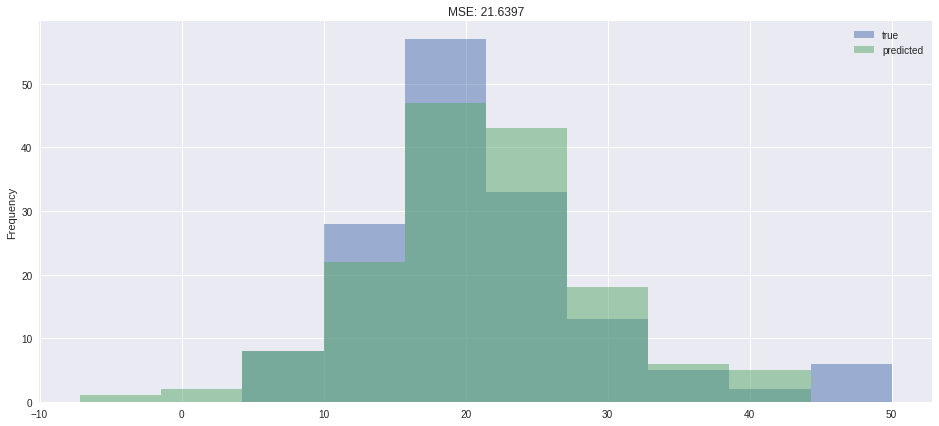

In [0]:
pred = pd.DataFrame({
    'true': [x[0].tolist() for x in y_test],
    'predicted': [x[0].tolist() for x in net(X_test)],
})
pred.plot.hist(alpha=0.5,figsize=(16,7),title=f'MSE: {loss(net(X_test), y_test).item():.4f}')

### GLM Linear Regression

In [0]:
import statsmodels.api as sm
import patsy

***Load the data***

In [4]:
boston_dataset = load_boston()
boston = pd.DataFrame(data=boston_dataset.get('data'),columns=boston_dataset.get('feature_names'))
boston['PRICE'] = boston_dataset.get('target')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


We split again the data in `train/test` but this time a bit different

In [0]:
train,test = train_test_split(boston, test_size=0.3, random_state=42)

Then we create the `R` style formula for our matrices

In [6]:
formula = f"PRICE ~ {' + '.join(boston.columns[:-1])}"
formula

'PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

Pass the formula to the `dmatrices` method from `patsy` for both `train` and `test` dataframes

In [0]:
y_train, X_train = patsy.dmatrices(formula, train, return_type='matrix')
y_test, X_test = patsy.dmatrices(formula, test, return_type='matrix')

***General Liniar Mode (GLM)***

Using `Gaussian` Distribution

In [8]:
glm_gaussian = sm.GLM(y_train,X_train,data=train, family=sm.families.Gaussian(sm.families.links.log())).fit()
print(glm_gaussian.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  PRICE   No. Observations:                  354
Model:                            GLM   Df Residuals:                      340
Model Family:                Gaussian   Df Model:                           13
Link Function:                    log   Scale:                          17.746
Method:                          IRLS   Log-Likelihood:                -1004.4
Date:                Mon, 08 Jun 2020   Deviance:                       6033.6
Time:                        07:54:17   Pearson chi2:                 6.03e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5788      0.230     15.530      0.0

***Metrics***

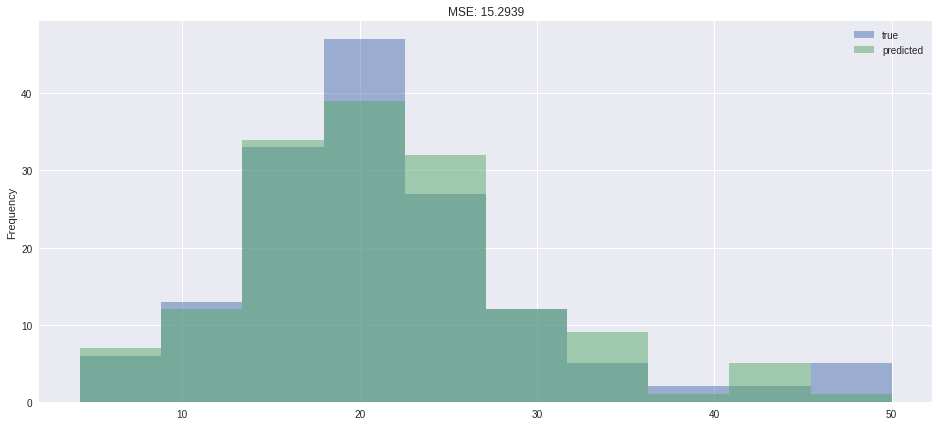

In [0]:
pred = pd.DataFrame({
    'true': [x[0] for x in y_test.tolist()],
    'predicted': glm_gaussian.predict(X_test)
})
pred.plot.hist(alpha=0.5,figsize=(16,7),title=f"MSE: {metrics.mean_squared_error(pred['true'],pred.predicted):.4f}")

Using `Gamma` Distribution

In [9]:
glm_gamma = sm.GLM(y_train,X_train,data=train, family=sm.families.Gamma(sm.families.links.log())).fit()
print(glm_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  PRICE   No. Observations:                  354
Model:                            GLM   Df Residuals:                      340
Model Family:                   Gamma   Df Model:                           13
Link Function:                    log   Scale:                        0.040116
Method:                          IRLS   Log-Likelihood:                -997.01
Date:                Mon, 08 Jun 2020   Deviance:                       12.717
Time:                        07:54:34   Pearson chi2:                     13.6
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9604      0.250     15.820      0.0

***Metrics***

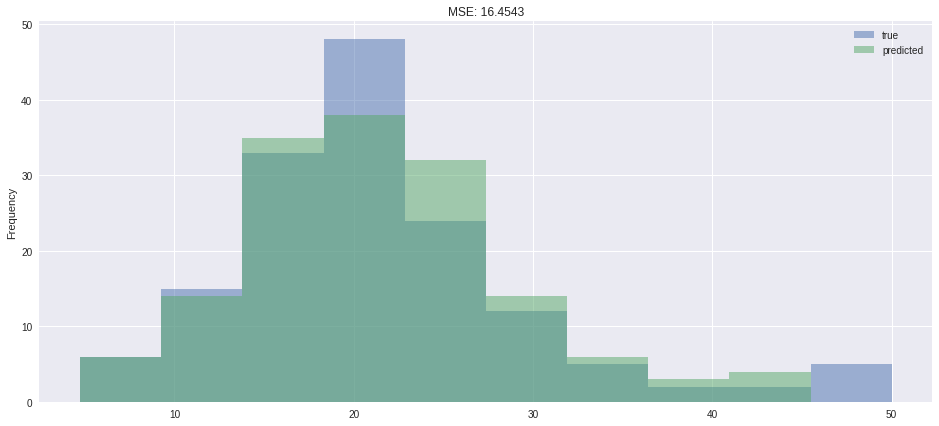

In [10]:
pred = pd.DataFrame({
    'true': [x[0] for x in y_test.tolist()],
    'predicted': glm_gamma.predict(X_test)
})
pred.plot.hist(alpha=0.5,figsize=(16,7),title=f"MSE: {metrics.mean_squared_error(pred['true'],pred.predicted):.4f}")

### XGBoost Linear Regression

In [0]:
import xgboost as xgb

***Load the data***

In [0]:
boston_dataset = load_boston()
boston = pd.DataFrame(data=boston_dataset.get('data'),columns=boston_dataset.get('feature_names'))
boston['PRICE'] = boston_dataset.get('target')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


***Train/Test Split***

In [0]:
X_train, X_test, y_train, y_test = train_test_split(boston[boston_dataset.get('feature_names')], boston['PRICE'], test_size=0.3, random_state=42)

Train a `Regression` model using `reg:gamma` for objective aka `Gamma` distribution

In [0]:
reg = xgb.XGBRegressor(n_estimators=1000,objective='reg:gamma')
reg.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='rmse',verbose=100)

[0]	validation_0-rmse:22.5723
[100]	validation_0-rmse:3.35307
[200]	validation_0-rmse:3.17188
[300]	validation_0-rmse:3.14021
[400]	validation_0-rmse:3.12192
[500]	validation_0-rmse:3.1099
[600]	validation_0-rmse:3.11599
[700]	validation_0-rmse:3.12263
[800]	validation_0-rmse:3.12669
[900]	validation_0-rmse:3.13014
[999]	validation_0-rmse:3.13269


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

***Metrics***

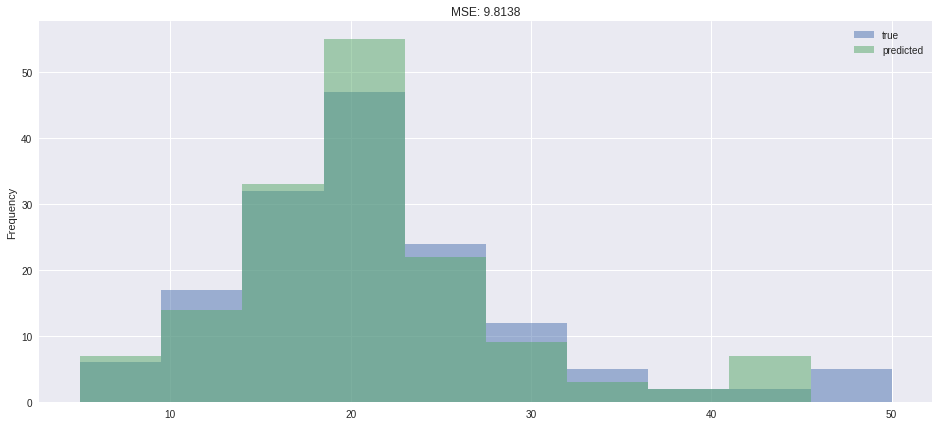

In [0]:
pred = pd.DataFrame({
    'true': y_test.values,
    'predicted': reg.predict(X_test)
})
pred.plot.hist(alpha=0.5,figsize=(16,7),title=f"MSE: {metrics.mean_squared_error(pred['true'],pred.predicted):.4f}")

## Classification

### MNIST Dataset

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


Training: `60,000` samples

Test: `10,000` samples

Image Dimension: `28x28`

Labels: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`

[Dataset Original Link](http://yann.lecun.com/exdb/mnist/)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems

In [0]:
from torchvision import datasets, transforms

`Compose` a transformer to nomralize the data

* `transforms.ToTensor()` converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1.

* `transforms.Normalize()` normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.


In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

Download the dataset and normalize it

In [0]:
# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)

Load the `train`/`test` into a DataLoader

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
def plot_digit(digit,**fig_params):
  plt.figure(**fig_params)
  plt.axis('off')
  plt.imshow(digit.numpy().squeeze(), cmap='gray_r')

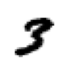

In [0]:
plot_digit(images[13],figsize=(1,1))

### PyTorch Classification

Sources:

* [Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
* [Handwritten Digit Recognition](https://github.com/amitrajitbose/handwritten-digit-recognition/blob/master/handwritten_digit_recognition_CPU.ipynb)

Then we define a `Seqeuntial` model with 3 levels of layers, `Linear` which applies a linear transformation and `ReLu` which applies the rectified linear, the output of this chain of transofrmation being passed into `LogSoftmax` activation function

In [0]:
# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[1], output_size),
                      torch.nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


Our loss function is `NegativeLogLoss`

In [0]:
loss = torch.nn.NLLLoss()

For this model the optimizer is `SGD` -> `Stochastic Gradient Descent`

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

This time on the training process we reshape each image matrix into one 1x1 array

In [0]:
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        
        l = loss(output, labels)
        
        l.backward()

        optimizer.step()
        
        running_loss += l.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6175047809492423
Epoch 1 - Training loss: 0.27926216799535475
Epoch 2 - Training loss: 0.21707710018877918
Epoch 3 - Training loss: 0.17828493828434488
Epoch 4 - Training loss: 0.14850337554349194
Epoch 5 - Training loss: 0.12661053494476815
Epoch 6 - Training loss: 0.11251892998659693
Epoch 7 - Training loss: 0.10000329123718589
Epoch 8 - Training loss: 0.08876785766164552
Epoch 9 - Training loss: 0.08140811096054754
Epoch 10 - Training loss: 0.07434628869015683
Epoch 11 - Training loss: 0.06872579670681962
Epoch 12 - Training loss: 0.06227882651151466
Epoch 13 - Training loss: 0.05694495400846767
Epoch 14 - Training loss: 0.05275964385930147

Training Time (in minutes) = 3.717697087923686


Validation Process

In [0]:
y_true,y_pred = list(),list()
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    y_true.append(true_label)
    y_pred.append(pred_label)
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9745


***Classification Report***

In [0]:
print(metrics.classification_report(y_true=y_true,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



***Confusion Matrix***

In [0]:
pd.DataFrame(data=metrics.confusion_matrix(y_true=y_true,y_pred=y_pred))

,0,1,2,3,4,5,6,7,8,9
0,968,0,0,1,0,4,2,2,2,1
1,0,1124,3,2,0,1,1,1,3,0
2,4,1,1005,5,3,0,1,9,4,0
3,0,0,3,991,0,5,0,6,4,1
4,0,0,7,1,953,0,1,6,1,13
5,4,2,0,11,2,860,6,1,2,4
6,5,4,1,0,4,7,932,0,5,0
7,1,6,7,1,0,0,0,1010,0,3
8,3,2,4,4,4,3,3,3,947,1
9,2,5,0,7,14,3,1,19,3,955


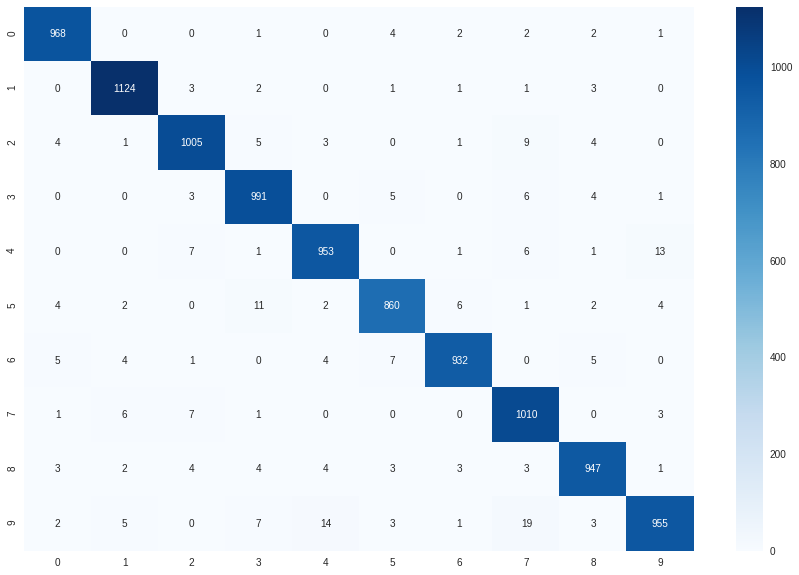

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(data=metrics.confusion_matrix(y_true=y_true,y_pred=y_pred),columns=list(range(10)),index=list(range(10))),cmap='Blues',annot=True, fmt="d")

### XGBoost Classification

Sources:
* [Ensemble Learning case study: Running XGBoost on Google Colab free GPU](https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101)
* [Multiclass & Multilabel Classification with XGBoost](https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d)

In [0]:
import xgboost as xgb

Extract `train`/`test` data from the data loaders

In [0]:
X_train = np.array([x.flatten() for x in trainset.data.numpy()])
y_train = np.array([x.flatten() for x in trainset.targets.numpy()])

X_test = np.array([x.flatten() for x in valset.data.numpy()])
y_test = np.array([x.flatten() for x in valset.targets.numpy()])

For the `XGBClassifier` the `multi:softmax` objective is used to permit training on multiple label classificaiton

In [0]:
%%time
xgc = xgb.XGBClassifier(n_jobs=-1,objective='multi:softmax',num_class=10 ,max_depth=4)
xgc.fit(X_train,y_train.ravel())

CPU times: user 2min 48s, sys: 1min 55s, total: 4min 44s
Wall time: 4min 44s


***Classification Report***

In [0]:
preds = pd.DataFrame({
    'true': y_test.ravel(),
    'preds': xgc.predict(X_test)
})
print(metrics.classification_report(y_true=preds['true'],y_pred=preds['preds']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.96      0.95      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



***Confusion Matrix***

In [0]:
pd.DataFrame(data=metrics.confusion_matrix(y_true=preds['true'],y_pred=preds['preds']))

,0,1,2,3,4,5,6,7,8,9
0,969,0,1,0,0,1,3,1,4,1
1,0,1123,2,1,0,1,4,1,3,0
2,9,0,978,12,9,0,1,11,10,2
3,2,0,14,956,0,11,2,9,8,8
4,2,0,4,0,922,1,7,1,5,40
5,5,3,2,13,1,843,6,4,10,5
6,7,3,0,0,5,11,925,0,7,0
7,2,6,24,3,3,1,0,963,6,20
8,5,2,5,5,4,5,6,7,918,17
9,8,7,2,8,15,5,0,6,7,951


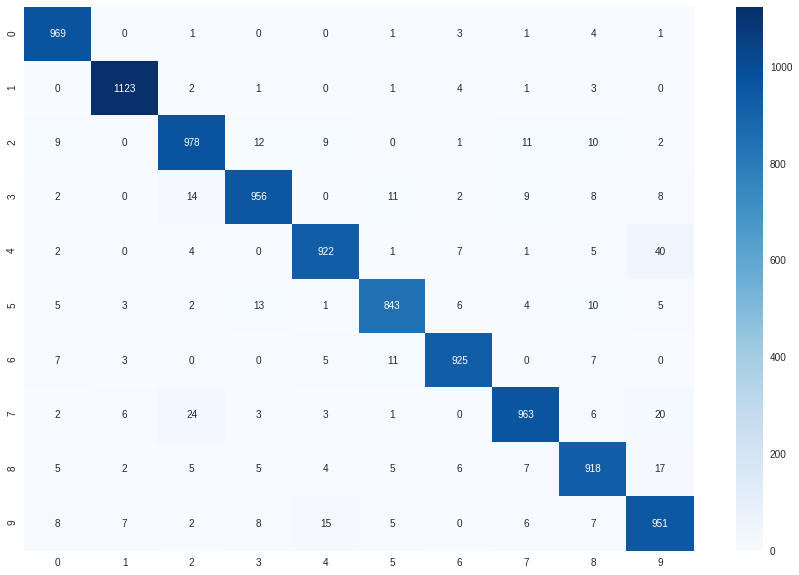

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(data=metrics.confusion_matrix(y_true=preds['true'],y_pred=preds['preds']),columns=list(range(10)),index=list(range(10))),cmap='Blues',annot=True, fmt="d")